# Cubed sphere
 
<img src="https://www.researchgate.net/publication/355106255/figure/fig1/AS:11431281278830376@1726767488611/Illustration-of-a-C16-grid-A-cubed-sphere-grid-always-has-six-faces-One-of-the-six.png" style="width:40%;" alt=""><img src="https://mitgcm.readthedocs.io/en/latest/_images/s6t_32x32.svg" style="width:40%;" alt="">



In [14]:
import numpy as np
import cubedsphere as cs

import matplotlib.pyplot as plt

In [ ]:
# This is the directory where you run the model
outdir_ascii = "/Users/hajsong/MITgcm/verification/aim.5l_cs/run_co2_320"

In [29]:
ds_ascii, grid = cs.open_ascii_dataset(outdir_ascii, iters=[276480], 
                                       prefix = ["Ttave","uVeltave","vVeltave","PhHytave"])
# regrid dataset
regrid = cs.Regridder(ds_ascii, grid)
ds = regrid()

could not rename, got error: cannot rename 'T' because it is not a variable or dimension in this dataset
time needed to build regridder: 0.32034993171691895
Regridder will use conservative method


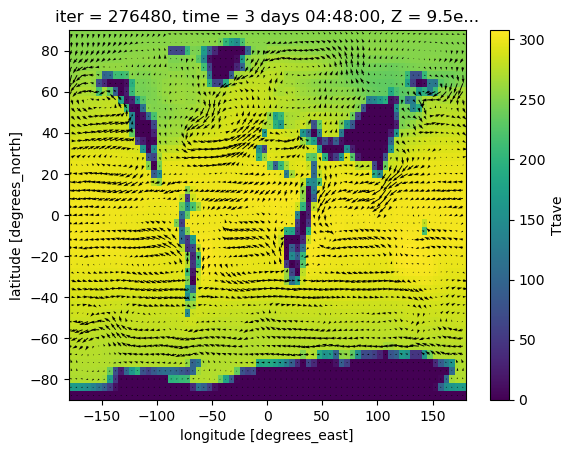

In [31]:
plt.figure()
# Select horizontal slice at latest time:
data = ds.isel(time=-1,Z=0)
# Plot temperature:
data.Ttave.plot()
# Overplot winds:
cs.overplot_wind(ds, data.uVeltave.values, data.vVeltave.values)
plt.show()

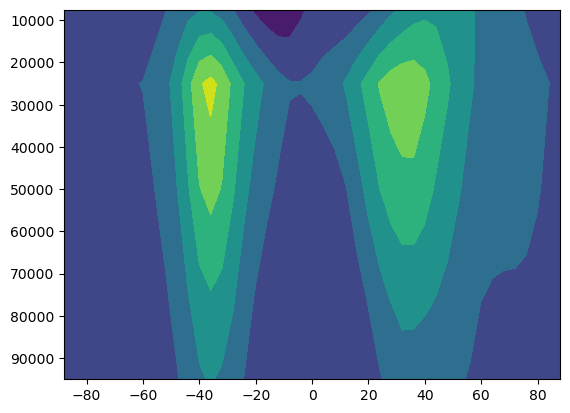

In [ ]:
plt.figure()
zmean = ds.uVeltave.isel(time=-1).mean(dim='lon')
plt.contourf(ds.lat, ds.Z, zmean)
plt.gca().invert_yaxis()
plt.show()

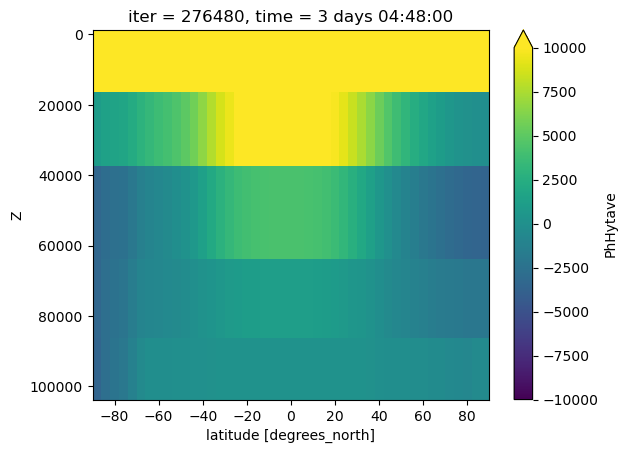

In [32]:
plt.figure()
zmean = ds.PhHytave.isel(time=-1).mean(dim='lon')
zmean.plot(vmin=-10000, vmax=10000)
plt.gca().invert_yaxis()
plt.show()